In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='UrbanSound8K/111671-8-0-12.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

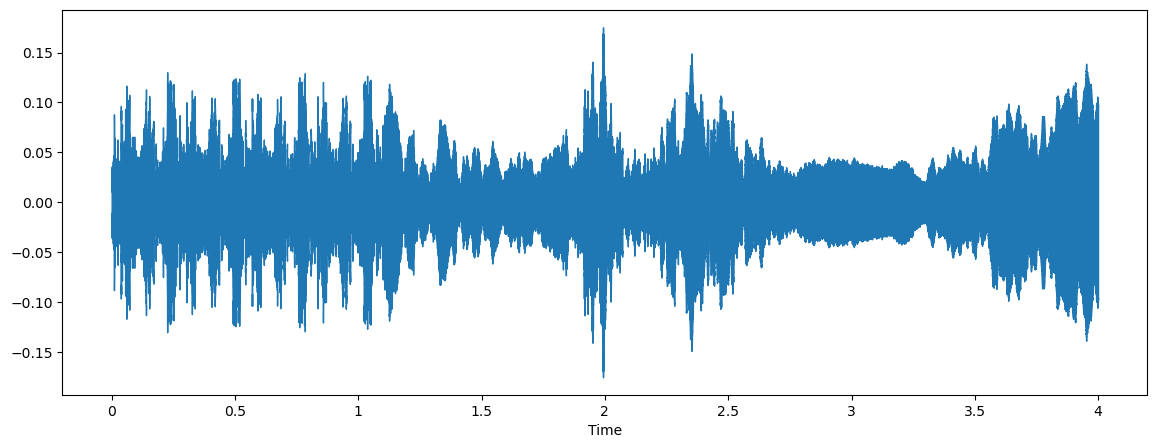

In [5]:
###Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [7]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [8]:
sample_rate

22050

In [9]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [10]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


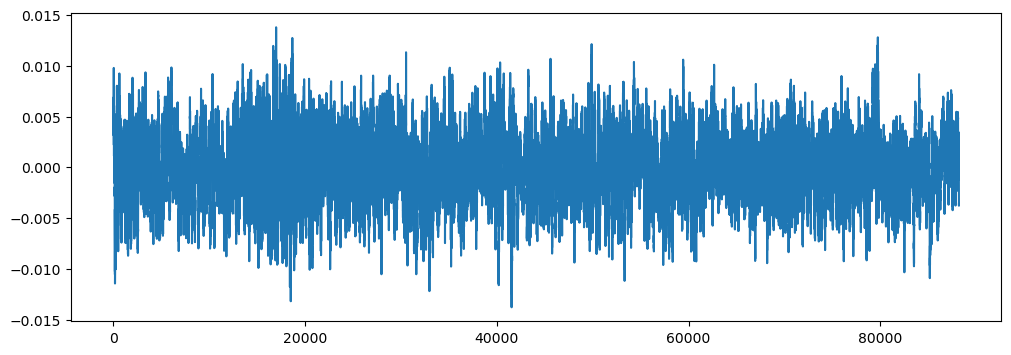

In [11]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [12]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [13]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

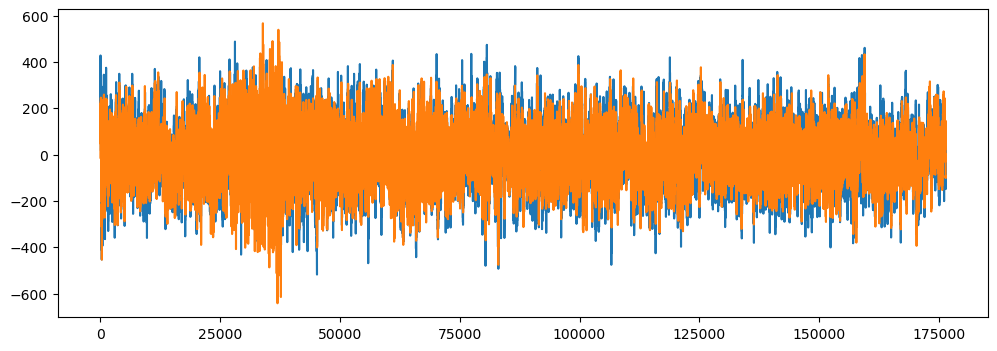

In [14]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [16]:
mfccs

array([[-4.74862732e+02, -4.50886139e+02, -4.49053375e+02, ...,
        -4.76761566e+02, -4.73348694e+02, -4.90852692e+02],
       [ 1.15302635e+02,  1.11442474e+02,  1.11252251e+02, ...,
         1.11124992e+02,  1.10579697e+02,  1.02991508e+02],
       [-1.83261528e+01, -2.46824455e+01, -3.02597733e+01, ...,
        -8.23575783e+00, -9.06652641e+00, -4.50195980e+00],
       ...,
       [-2.87604427e+00, -3.24798608e+00, -4.89655685e+00, ...,
        -5.20236254e-01,  3.56725931e+00,  7.49376059e+00],
       [-4.29674745e-01, -5.88379323e-01, -8.17237914e-01, ...,
         1.83396637e-01,  7.67324150e-01,  2.71200562e+00],
       [-1.17807102e+00,  6.98090434e-01,  6.35215712e+00, ...,
        -2.62218857e+00, -4.79127121e+00, -3.18263721e+00]], dtype=float32)

In [17]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [21]:
!pip install resampy


  Obtaining dependency information for resampy from https://files.pythonhosted.org/packages/4d/b9/3b00ac340a1aab3389ebcc52c779914a44aadf7b0cb7a3bf053195735607/resampy-0.4.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.1 MB/s eta 0:00:0000:0100:010m


In [26]:
pip install resampy


Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
from tqdm import tqdm
import resampy
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:30, 23.50it/s]/Users/i.am.benjamin./anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [05:36, 33.91it/s]/Users/i.am.benjamin./anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/i.am.benjamin./anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:52, 24.76it/s]


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [54]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [55]:
X.shape

(8732, 40)

In [56]:
### Label Encoding
#y=np.array(pd.get_dummies(y))
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [57]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [58]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [59]:
y.shape

(8732, 10)

In [25]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [27]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [28]:

X_train.shape

(6985, 40)

In [29]:
X_test.shape

(1747, 40)

In [30]:
y_train.shape

(6985, 10)

In [31]:
y_test.shape

(1747, 10)

In [33]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/0f/a5/89a9bdae9f241cad167edb6c890ef2b4c842c5ae81058a2fbfd702dba9bf/tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 5.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 11.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 14.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.8 MB/s eta 0

In [34]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [36]:
### No of classes
num_labels=y.shape[1]

In [38]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/Users/i.am.benjamin./anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [42]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
176/219 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.1180 - loss: 24.4034 
Epoch 1: val_loss improved from inf to 2.29168, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1198 - loss: 21.8497 - val_accuracy: 0.1048 - val_loss: 2.2917
Epoch 2/100
152/219 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.1246 - loss: 2.7661
Epoch 2: val_loss improved from 2.29168 to 2.27999, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.1250 - loss: 2.7166 - val_accuracy: 0.1076 - val_loss: 2.2800
Epoch 3/100
146/219 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.1203 - loss: 2.3791
Epoch 3: val_loss improved from 2.27999 to 2.24878, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.1207 - loss: 2.3677 - val_accuracy: 0.1603 - val_loss: 2.2488
Epoch 4/100
159/219 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step 

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.4680 - loss: 1.5386 - val_accuracy: 0.5592 - val_loss: 1.3555
Epoch 23/100
160/219 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.4481 - loss: 1.5555
Epoch 23: val_loss did not improve from 1.35545
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.4497 - loss: 1.5544 - val_accuracy: 0.5467 - val_loss: 1.3584
Epoch 24/100
161/219 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4710 - loss: 1.5086
Epoch 24: val_loss improved from 1.35545 to 1.28982, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.4728 - loss: 1.5082 - val_accuracy: 0.5758 - val_loss: 1.2898
Epoch 25/100
163/219 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.4960 - loss: 1.4517
Epoch 25: val_loss improved from 1.28982 to 1.24811, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.4953 - loss: 1.4547 - val_accuracy: 0.5959 - val_l

150/219 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.6037 - loss: 1.1743
Epoch 45: val_loss did not improve from 0.96212
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.6042 - loss: 1.1744 - val_accuracy: 0.6966 - val_loss: 0.9623
Epoch 46/100
160/219 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5956 - loss: 1.1811
Epoch 46: val_loss did not improve from 0.96212
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.5981 - loss: 1.1765 - val_accuracy: 0.7035 - val_loss: 0.9717
Epoch 47/100
157/219 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6142 - loss: 1.1277
Epoch 47: val_loss improved from 0.96212 to 0.95228, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6132 - loss: 1.1353 - val_accuracy: 0.7029 - val_loss: 0.9523
Epoch 48/100
155/219 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.6244 - loss: 1.1383
Epoch 48: val_loss did not improve from 0.95228
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step 

Epoch 69/100
159/219 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6610 - loss: 1.0245
Epoch 69: val_loss did not improve from 0.84316
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.6606 - loss: 1.0256 - val_accuracy: 0.7327 - val_loss: 0.8443
Epoch 70/100
160/219 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.6646 - loss: 1.0094
Epoch 70: val_loss did not improve from 0.84316
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.6633 - loss: 1.0177 - val_accuracy: 0.7293 - val_loss: 0.8620
Epoch 71/100
159/219 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.6686 - loss: 1.0187
Epoch 71: val_loss improved from 0.84316 to 0.81932, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6675 - loss: 1.0177 - val_accuracy: 0.7441 - val_loss: 0.8193
Epoch 72/100
163/219 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.6674 - loss: 1.0316
Epoch 72: val_loss did not improve from 0.81932
219/219 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 93/100
155/219 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.6725 - loss: 0.9856
Epoch 93: val_loss did not improve from 0.76858
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.6734 - loss: 0.9817 - val_accuracy: 0.7602 - val_loss: 0.7867
Epoch 94/100
152/219 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6713 - loss: 1.0431
Epoch 94: val_loss did not improve from 0.76858
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6730 - loss: 1.0291 - val_accuracy: 0.7562 - val_loss: 0.7986
Epoch 95/100
150/219 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.6690 - loss: 0.9911
Epoch 95: val_loss improved from 0.76858 to 0.76634, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.6722 - loss: 0.9838 - val_accuracy: 0.7676 - val_loss: 0.7663
Epoch 96/100
153/219 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6763 - loss: 0.9851
Epoch 96: val_loss did not improve from 0.76634
219/219 ━━━━━━━━━━━━━━━━━━━━ 0

In [43]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7590154409408569


In [46]:
filename = "UrbanSound8K/100263-2-0-3.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)

# Use predict method instead of predict_classes
predictions = model.predict(prediction_feature)
predicted_class = np.argmax(predictions, axis=1)

print("Predicted class: ", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class:  [9]


In [47]:
prediction_feature.shape

(1, 40)

In [48]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579992 ,   -8.16233   ,  -15.153101  ,   -6.6048055 ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009956  ,    0.5334608 ,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [50]:
# Using the predict method to get the probabilities
predictions = model.predict(X_test)

# Getting the class indices with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Output the predicted class indices
print(predicted_classes)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
[5 3 4 ... 1 2 0]


In [60]:
filename = "UrbanSound8K/100263-2-0-3.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)

mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use predict to get the output probabilities
predictions = model.predict(mfccs_scaled_features)

# Use argmax to convert probabilities to class index
predicted_label = np.argmax(predictions, axis=1)
print(predicted_label)

# Use the label encoder to translate the numeric class into a meaningful label
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)


[-4.6408258e+02  1.1631008e+02 -2.8826920e+01  4.9442039e+01
 -4.5637674e+00  3.1208353e+01  7.1696935e+00  1.6191448e+01
 -1.7445767e+00  1.3571003e+01 -9.4071569e+00  1.6204025e+01
 -4.9584494e+00  9.0168409e+00 -3.3181498e+00  5.6271691e+00
 -4.5221338e+00  1.0323892e+01 -3.6285520e+00  7.0015807e+00
 -3.6718299e+00  5.2377439e+00 -3.1023760e+00  4.9436297e+00
 -4.7702332e+00  1.0352482e+00 -3.2199662e+00 -5.6133109e-01
 -1.9294977e+00  1.3998429e+00  3.0964246e-01 -2.6166530e-02
 -1.6374362e+00  1.8562682e+00 -2.2025812e+00 -7.3360807e-01
 -5.7700121e-01 -1.7442561e+00 -2.3653147e+00  7.8772151e-01]
[[-4.6408258e+02  1.1631008e+02 -2.8826920e+01  4.9442039e+01
  -4.5637674e+00  3.1208353e+01  7.1696935e+00  1.6191448e+01
  -1.7445767e+00  1.3571003e+01 -9.4071569e+00  1.6204025e+01
  -4.9584494e+00  9.0168409e+00 -3.3181498e+00  5.6271691e+00
  -4.5221338e+00  1.0323892e+01 -3.6285520e+00  7.0015807e+00
  -3.6718299e+00  5.2377439e+00 -3.1023760e+00  4.9436297e+00
  -4.7702332e+00 